<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/PyTorch_Learning_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download and Descompact Images

In [2]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2022-08-09 18:32:17--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2.41G  15.1MB/s    in 2m 53s  

2022-08-09 18:35:10 (14.3 MB/s) - ‘indoorCVPR_09.tar’ saved [2592010240/2592010240]



In [3]:
!tar -xvf indoorCVPR_09.tar

A saída de streaming foi truncada nas últimas 5000 linhas.
Images/mall/cover_home3.jpg
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/m

# Preparing Datasets Files

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import shutil
import warnings
warnings.filterwarnings('ignore')

In [5]:
num_files_per_folder = [len(files) for root, dirs, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]
num_files_per_folder[:10], folders[:10]

([127, 101, 140, 131, 114, 176, 539, 109, 120, 113],
 ['kindergarden',
  'elevator',
  'artstudio',
  'dentaloffice',
  'computerroom',
  'mall',
  'subway',
  'office',
  'cloister',
  'classroom'])

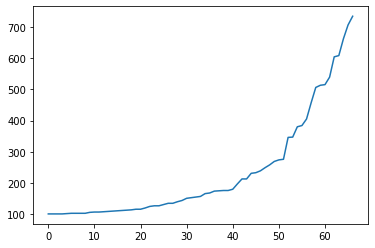

In [6]:
plt.plot(sorted(num_files_per_folder));

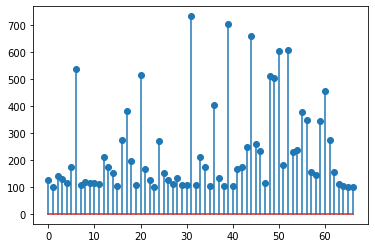

In [7]:
plt.stem(num_files_per_folder);

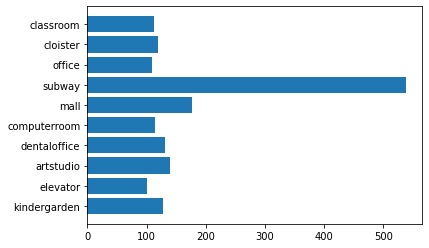

In [8]:
plt.barh(folders[:10], num_files_per_folder[:10]);

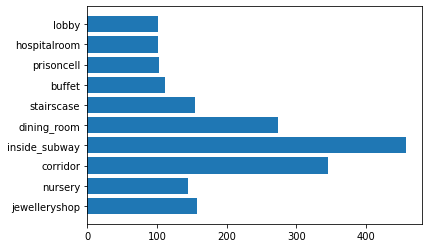

In [9]:
plt.barh(folders[-10:], num_files_per_folder[-10:]);

In [10]:
# checking how many categories has above 600 images
sum(np.array(num_files_per_folder) > 600)

5

In [11]:
mask = np.array(num_files_per_folder) > 600
folders_keep = list(np.array(folders)[mask])
folders_keep

['kitchen', 'livingroom', 'bedroom', 'bar', 'airport_inside']

In [12]:
# deleting unusable folders
[shutil.rmtree('Images/' + folder) for folder in folders if folder not in folders_keep];

In [13]:
num_files_per_folder = [len(files) for root, dirs, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]
file_names = [os.listdir('Images/' + folder) for folder in folders]
num_files_per_folder[:10], folders[:10], file_names[:10]

([734, 706, 662, 604, 608],
 ['kitchen', 'livingroom', 'bedroom', 'bar', 'airport_inside'],
 [['smallsp021.jpg',
   'kitchen077.jpg',
   'cdMC1162.jpg',
   'N364007.jpg',
   'kitchen137.jpg',
   'kitchen028.jpg',
   'N190017.jpg',
   'cimg2051.jpg',
   'int357.jpg',
   'cdMC1130.jpg',
   'int455.jpg',
   'im4.jpg',
   'dsc00911.jpg',
   'IMG_2431.jpg',
   'indoor_0282.jpg',
   'cdMC1149.jpg',
   'kitchen061.jpg',
   'N364027.jpg',
   'int423.jpg',
   'N190023.jpg',
   'N55m.jpg',
   'indoor_0116.jpg',
   'int788.jpg',
   'int456.jpg',
   'cozinha2.jpg',
   'N364073.jpg',
   'indoor_0360.jpg',
   'cdMC1193.jpg',
   'N364031.jpg',
   'kitchen037.jpg',
   'room17.jpg',
   'int432.jpg',
   'dsc01023.jpg',
   'N364079.jpg',
   'N364057.jpg',
   'a__4_.jpg',
   'cdMC1131.jpg',
   'N364015.jpg',
   'room461.jpg',
   'int426.jpg',
   'or-99-5-9382-03_l.jpg',
   'kitchen001.jpg',
   'dscf2952.jpg',
   'room28.jpg',
   'kitchen027.jpg',
   'int26.jpg',
   'N364054.jpg',
   'int397.jpg',
   'int8

In [14]:
np.random.seed(42)
files_test = [sorted(np.random.choice(files, round(num_files * 0.2), replace=False))\
              for files, num_files in zip(file_names, num_files_per_folder)]

In [15]:
os.mkdir('Images/test')
[os.mkdir('Images/test/' + folder) for folder in folders];
[shutil.move('Images/' + folder + '/' + file, 'Images/test/' + folder + '/' + file)\
 for files, folder in zip(files_test, folders) for file in files];

In [16]:
os.mkdir('Images/train/')
[shutil.move('Images/' + folder, 'Images/train/' + folder) for folder in folders];

In [17]:
os.rename('Images', 'dataset')

# Checking Images

In [18]:
file_names = [os.listdir('dataset/train/' + folder) for folder in folders]
file_visualize = [sorted(np.random.choice(files, 4 ,replace=False)) for files in file_names]
file_visualize

[['D55b.jpg', 'N190041.jpg', 'N364002.jpg', 'kitchen102.jpg'],
 ['OR_02_03_0214_04_l.jpg',
  'at_99_3_8168_13_l.jpg',
  'indoor_0109.jpg',
  'int543.jpg'],
 ['S03.jpg', 'indoor_0177.jpg', 'int262.jpg', 'int533.jpg'],
 ['bar_0066.jpg', 'bar_0083.jpg', 'bar_0094.jpg', 'bar_0146.jpg'],
 ['airport_inside_0042.jpg',
  'airport_inside_0181.jpg',
  'airport_inside_0431.jpg',
  'airport_inside_0436.jpg']]

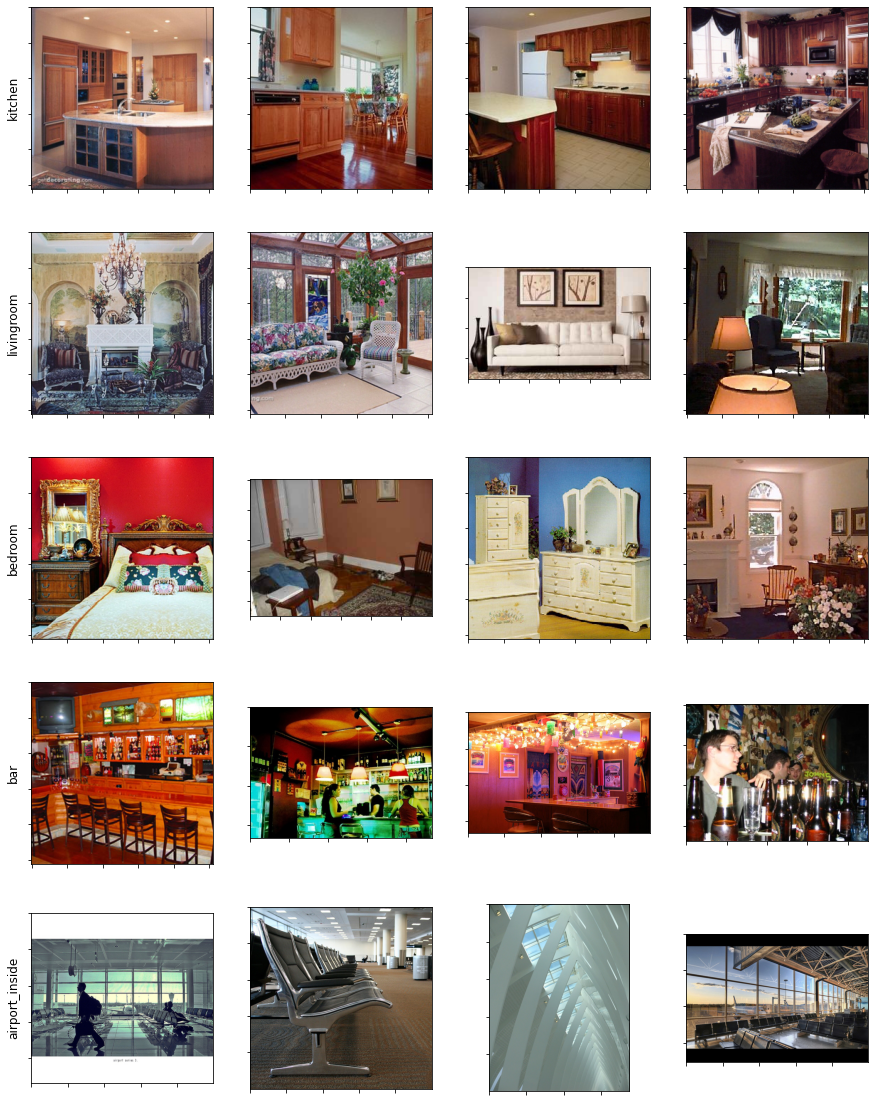

In [19]:
f, ax = plt.subplots(5,4,figsize=(15,20))
for row in range(5):
    category = folders[row]
    ax_row = ax[row]
    for col in range(4):
        img = plt.imread('dataset/train/' + category + '/' + file_visualize[row][col])
        ax_col = ax_row[col]
        ax_col.imshow(img)
        if col == 0:
            ax_col.set_ylabel(category, size='large')
        ax_col.set_xticklabels([])
        ax_col.set_yticklabels([])

# Preparing Dataset to PyTorch 

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import optim
from datetime import datetime
from torchvision import datasets, models

In [21]:
torch.manual_seed(124);

In [22]:
data_dir_train = 'dataset/train'
data_dir_test = 'dataset/test'

tranform = transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])

train_dataset = datasets.ImageFolder(data_dir_train, transform=tranform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(data_dir_test, transform=tranform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

# Defining Model and Parameters Train

In [23]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [24]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [25]:
# changing layer '(6): Linear(in_features=4096, out_features=1000, bias=True)'
n_inputs = model.classifier[6].in_features
classification_layer = nn.Linear(n_inputs, len(train_dataset.classes))
model.classifier[6] = classification_layer
n_inputs, len(train_dataset.classes)

(4096, 5)

In [26]:
# frozeing features
for param in model.features.parameters():
    param.requires_grad=False

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training and Validation

In [28]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
def training_loop(loader, epoch):
    # variables to accumalate loss and precision
    running_loss = 0.
    running_accuracy = 0.
    
    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()        
        outputs = model(inputs)      
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # as 'output' didn't pass for activation, we going to do that now using
        # 'F.softmax', then we use 'torch.argmax' to return the high prediction indice
        predicted = torch.argmax(F.softmax(outputs, dim = 1), dim = 1)
        
        # now, we can see how many prediction the model got right
        equals = predicted == labels
        
        # the precicion will be the variable mean before(number 'true' divided by total)
        accuracy = torch.mean(equals.float())
        running_accuracy += accuracy

        print('Epoch {} | loop {}/{}: loss {:.5f} - precision {:.5f}'.format(epoch + 1, i + 1, len(loader), loss.item(), accuracy))
        
    # Imprimindo os dados referentes a esta época

    print('>>>>> Epoch {} Ended: loss {:.5f} - precision {:.5f}'.format(epoch + 1, running_loss/len(loader), running_accuracy/len(loader)))

In [30]:
start = datetime.now()
for epoch in range(5):
    print('Training ...')
    training_loop(train_loader, epoch)
    model.eval()
    print('Validating ...')
    training_loop(test_loader, epoch)
    model.train()
end = datetime.now()

print('Training/Validation had duration of {}'.format(end - start))

Training ...
Epoch 1 | loop 1/83: loss 1.58154 - precision 0.25000
Epoch 1 | loop 2/83: loss 3.09568 - precision 0.25000
Epoch 1 | loop 3/83: loss 2.82777 - precision 0.37500
Epoch 1 | loop 4/83: loss 3.80957 - precision 0.18750
Epoch 1 | loop 5/83: loss 1.87746 - precision 0.28125
Epoch 1 | loop 6/83: loss 1.34230 - precision 0.43750
Epoch 1 | loop 7/83: loss 1.34699 - precision 0.46875
Epoch 1 | loop 8/83: loss 1.29884 - precision 0.50000
Epoch 1 | loop 9/83: loss 1.80234 - precision 0.31250
Epoch 1 | loop 10/83: loss 0.94657 - precision 0.59375
Epoch 1 | loop 11/83: loss 1.64674 - precision 0.53125
Epoch 1 | loop 12/83: loss 2.57308 - precision 0.25000
Epoch 1 | loop 13/83: loss 1.70344 - precision 0.46875
Epoch 1 | loop 14/83: loss 1.48066 - precision 0.50000
Epoch 1 | loop 15/83: loss 1.65737 - precision 0.62500
Epoch 1 | loop 16/83: loss 1.86064 - precision 0.43750
Epoch 1 | loop 17/83: loss 1.18808 - precision 0.56250
Epoch 1 | loop 18/83: loss 1.04966 - precision 0.62500
Epoch 

#Checking

In [31]:
img, labels = next(iter(test_loader))
model.eval()
predict = model(img.to(device)).cpu()
predict = torch.argmax(F.softmax(predict, dim=1), dim=1)
predict

tensor([4, 2, 3, 4, 0, 1, 4, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 3, 4, 0, 3, 3, 4, 0,
        3, 3, 3, 4, 2, 2, 4, 4])

In [32]:
test_dataset.class_to_idx

{'airport_inside': 0, 'bar': 1, 'bedroom': 2, 'kitchen': 3, 'livingroom': 4}

In [33]:
# dict reverse
idx_class = {k: v for v, k in test_dataset.class_to_idx.items()}
idx_class

{0: 'airport_inside', 1: 'bar', 2: 'bedroom', 3: 'kitchen', 4: 'livingroom'}

In [34]:
labels, predict = labels.detach().numpy(), predict.detach().numpy()
labels = [idx_class[label] for label in labels]
predict = [idx_class[label] for label in predict]
labels, predict

(['livingroom',
  'bedroom',
  'kitchen',
  'livingroom',
  'airport_inside',
  'bar',
  'livingroom',
  'bedroom',
  'bedroom',
  'airport_inside',
  'bedroom',
  'bedroom',
  'bedroom',
  'airport_inside',
  'bar',
  'bar',
  'bedroom',
  'kitchen',
  'livingroom',
  'airport_inside',
  'kitchen',
  'kitchen',
  'livingroom',
  'airport_inside',
  'kitchen',
  'kitchen',
  'kitchen',
  'livingroom',
  'bedroom',
  'bedroom',
  'livingroom',
  'livingroom'],
 ['livingroom',
  'bedroom',
  'kitchen',
  'livingroom',
  'airport_inside',
  'bar',
  'livingroom',
  'bedroom',
  'bedroom',
  'airport_inside',
  'bedroom',
  'bedroom',
  'bedroom',
  'airport_inside',
  'bar',
  'bar',
  'bedroom',
  'kitchen',
  'livingroom',
  'airport_inside',
  'kitchen',
  'kitchen',
  'livingroom',
  'airport_inside',
  'kitchen',
  'kitchen',
  'kitchen',
  'livingroom',
  'bedroom',
  'bedroom',
  'livingroom',
  'livingroom'])

In [35]:
img.shape

torch.Size([32, 3, 224, 224])

In [37]:
# permuting dimensions
img = img.permute(0,2,3,1).numpy()

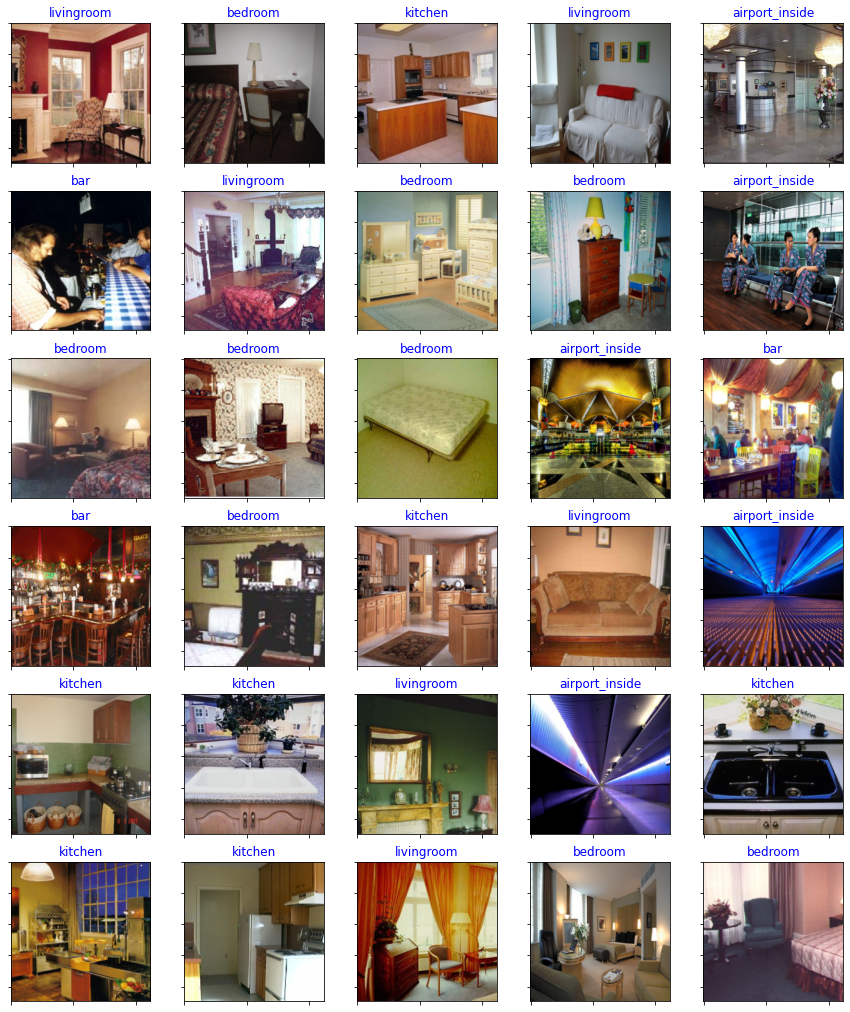

In [39]:
f, ax = plt.subplots(6,5,figsize=(15,18))
i = 0
for row in range(6):
    ax_row = ax[row]
    for column in range(5):
        ax_column = ax_row[column]
        ax_column.imshow(img[i])
        ax_column.set_xticklabels([])
        ax_column.set_yticklabels([])
        col = 'blue' if labels[i] == predict[i] else 'red'
        ax_column.set_title(predict[i], color = col)
        i += 1 